In [1]:
import requests
import json

In [6]:
from PIL import Image
import requests
from io import BytesIO
URL_IMG = "https://nocamels.com/wp-content/uploads/2019/06/yandex-light.jpeg"
# URL_IMG = "https://lh3.googleusercontent.com/proxy/8hB99RAJW80Y-WNuMWFGqXGSl_6Iq8HmHqY8zeXFghEb9FdB8kNXytOxhtMizoKmdlhQJG2p33b2jtzEFsjhD2Gfpqim5ZGIBOObggjltKKxie5ZdYLHyiNH_emMLbzBma5Qdot1DEtS9n0KUE270Idy46CygRSUz_lO0QQfo7-Op5qjCw"
# URL_IMG = "https://i.pinimg.com/originals/e4/a2/d2/e4a2d21a1e545722ec3e28f85e9b1ffa.jpg"
# URL_IMG = "https://wallpaperaccess.com/full/314622.jpg"
# URL_IMG = "https://www.sparkbit.pl/wp-content/uploads/2019/07/vidar-nordli-mathisen-Kuu5mmxkwW4-unsplash.jpg"

response = requests.get(URL_IMG)
img_pil = Image.open(BytesIO(response.content))

In [7]:
img_pil.size

(800, 539)

In [8]:
len(img_pil.tobytes())

1293600

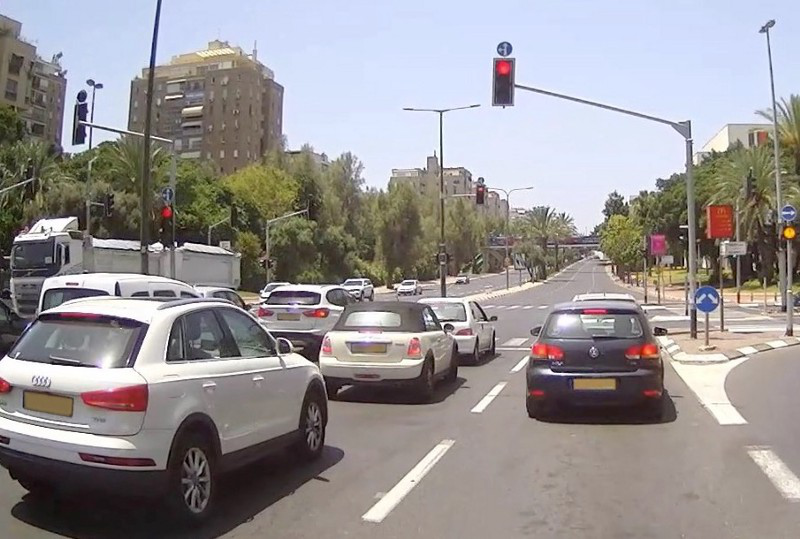

In [9]:
img_pil

In [10]:
img_pil.save('test_img.png')

In [11]:
import os
sz1 = os.path.getsize('test_img.png')
sz1

553180

In [12]:
type(response.content)

bytes

In [13]:
img_bytes = response.content 
sz2 = len(img_bytes)
sz2

108863

In [14]:
sz1/sz2

5.081432626328505

In [16]:
URL_APP = "http://fastaiserve.com/"


## Test img2img API

In [17]:
model_name='superres-2b'

In [18]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}{model_name}/img2img/"

# data to be sent to api 
img_bytes = response.content 
files = {'file': open('test_img.png', 'rb')}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, files=files) 

print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")
# r.json()

200
Time elapsed = 17.696105241775513


In [19]:
type(BytesIO(r.content))

_io.BytesIO

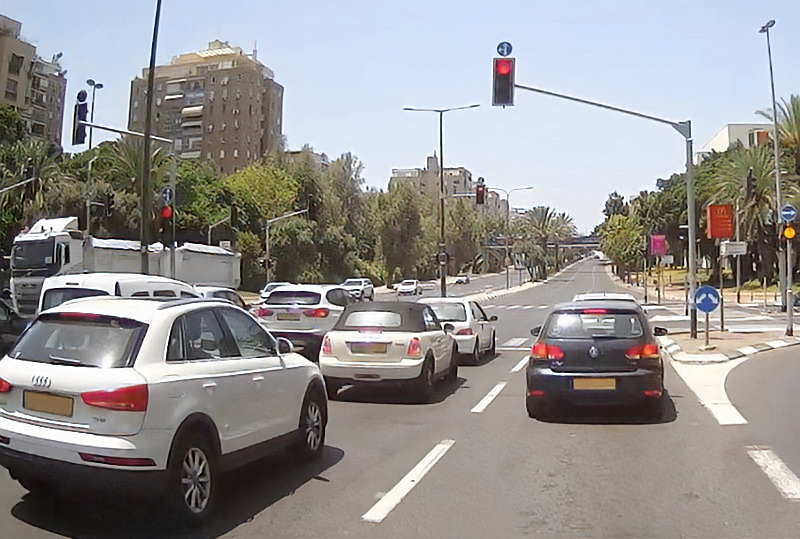

In [20]:
dataBytesIO = BytesIO(r.content)
img_hr = Image.open(dataBytesIO)
img_hr

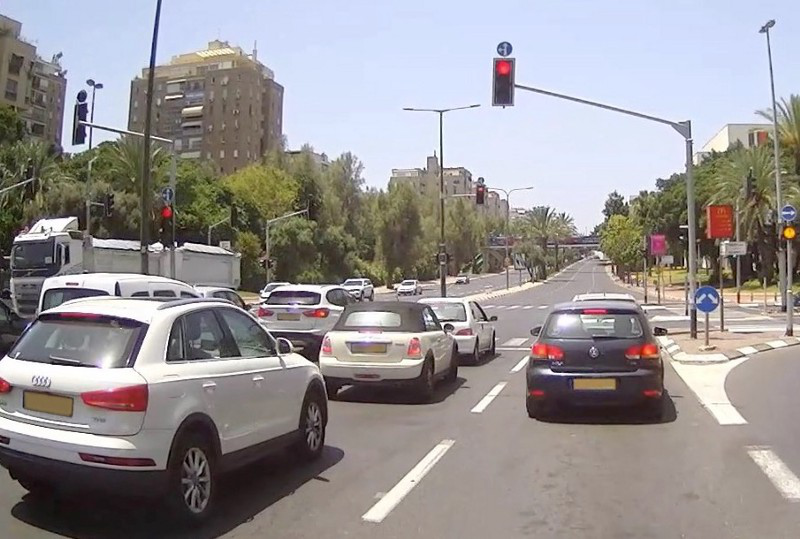

In [21]:
img_in = Image.open('test_img.png')
img_in

In [22]:
img_in.size

(800, 539)

In [23]:
img_hr.size

(800, 539)

# Test URLImage-to-Image API 

In [25]:
import time
start = time.time()

# api-endpoint 
API_ENDPOINT = f"{URL_APP}{model_name}/urlimg2img/"

# data to be sent to api 
params = {'url': URL_IMG}

# sending post request and saving response as response object 
r = requests.post(url = API_ENDPOINT, params=params) 
print(r.status_code)

end = time.time()
print(f"Time elapsed = {end-start}")

200
Time elapsed = 13.483783960342407


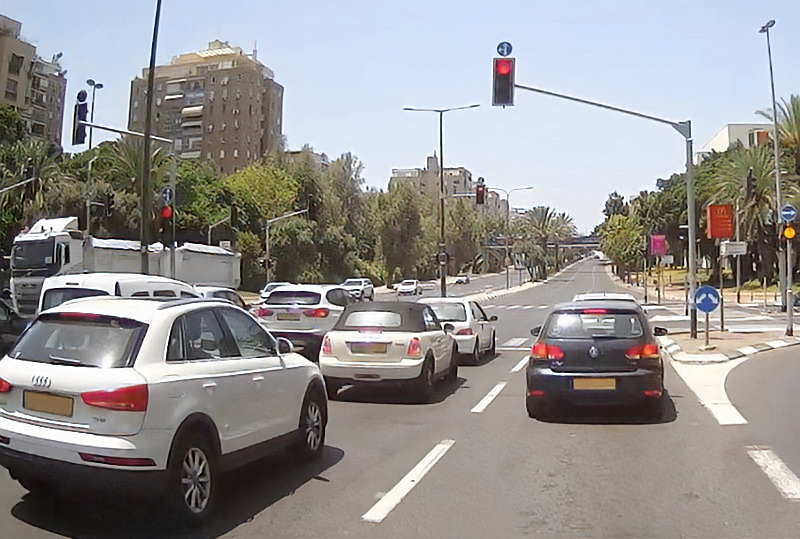

In [26]:
dataBytesIO = BytesIO(r.content)
img_hr2 = Image.open(dataBytesIO)
img_hr2

In [27]:
import numpy as np
absDiff = abs(np.array(img_hr2)-np.array(img_hr))
assert absDiff.sum()<1e-10